In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

### Read in the sample data and drop irrelevant features

In [2]:
df = pd.read_csv('../data/us_congestion_2016_2022_sample_2m.csv')

In [3]:
df = df.drop(['ID', 'Country', 'Description'], axis=1)

### 'Severity' column is numerical but still categorical, change it to a string type

In [4]:
df['Severity'] = df['Severity'].astype('string')

### 'StartTime' should be converted to DateTime
This could come in handy when we do our time series analysis

'WeatherTimeStamp' can be dropped if we assume that the start and end time of any event is a reasonable representation of the correspinding weather event.

In [7]:
df['StartTime'] = pd.to_datetime(df['StartTime'])

In [8]:
df['EndTime'] = pd.to_datetime(df['EndTime'])

In [9]:
# df['WeatherTimeStamp'] = pd.to_datetime(df['WeatherTimeStamp'])

In [10]:
df.head()

,Severity,Start_Lat,Start_Lng,StartTime,EndTime,Distance(mi),DelayFromTypicalTraffic(mins),DelayFromFreeFlowSpeed(mins),Congestion_Speed,Street,...,Temperature(F),WindChill(F),Humidity(%),Pressure(in),Visibility(mi),WindDir,WindSpeed(mph),Precipitation(in),Weather_Event,Weather_Conditions
0,2,39.191032,-120.819740,2016-12-20 19:19:00-05:00,2016-12-20 19:33:47-05:00,1.40,2.58,2.60,Moderate,I-80 W,...,54.0,NaN,30.0,30.15,10.0,North,3.5,NaN,NaN,Clear
1,0,41.736015,-87.721565,2018-11-16 17:18:00-05:00,2018-11-16 18:08:28-05:00,0.73,0.42,1.00,Slow,S Pulaski Rd,...,39.0,31.8,70.0,30.06,10.0,West,11.5,NaN,NaN,Overcast
2,0,32.519043,-93.741096,2021-02-18 20:32:00-05:00,2021-02-18 21:21:32-05:00,1.80,1.00,2.00,Moderate,E Texas St,...,30.0,30.0,79.0,30.20,10.0,WNW,3.0,0.00,NaN,Fair
3,0,40.730564,-74.001709,2020-11-13 08:06:00-05:00,2020-11-13 08:48:22-05:00,1.42,1.00,2.00,Slow,Avenue of the Americas,...,48.0,48.0,93.0,29.92,1.0,VAR,3.0,0.04,NaN,Light Rain
4,1,33.758331,-118.238533,2017-08-24 09:54:00-04:00,2017-08-24 11:13:19-04:00,2.60,4.90,6.92,Slow,W Ocean Blvd,...,66.9,NaN,79.0,29.89,9.0,Calm,NaN,NaN,NaN,Overcast


### Take a look at the different data types

In [11]:
numerical = df.select_dtypes(include='number')
numerical.head()

,Start_Lat,Start_Lng,Distance(mi),DelayFromTypicalTraffic(mins),DelayFromFreeFlowSpeed(mins),Temperature(F),WindChill(F),Humidity(%),Pressure(in),Visibility(mi),WindSpeed(mph),Precipitation(in)
0,39.191032,-120.819740,1.40,2.58,2.60,54.0,NaN,30.0,30.15,10.0,3.5,NaN
1,41.736015,-87.721565,0.73,0.42,1.00,39.0,31.8,70.0,30.06,10.0,11.5,NaN
2,32.519043,-93.741096,1.80,1.00,2.00,30.0,30.0,79.0,30.20,10.0,3.0,0.00
3,40.730564,-74.001709,1.42,1.00,2.00,48.0,48.0,93.0,29.92,1.0,3.0,0.04
4,33.758331,-118.238533,2.60,4.90,6.92,66.9,NaN,79.0,29.89,9.0,NaN,NaN


In [12]:
categorical = df.select_dtypes(exclude='number')
categorical.head()

,Severity,StartTime,EndTime,Congestion_Speed,Street,City,County,State,ZipCode,LocalTimeZone,WeatherStation_AirportCode,WeatherTimeStamp,WindDir,Weather_Event,Weather_Conditions
0,2,2016-12-20 19:19:00-05:00,2016-12-20 19:33:47-05:00,Moderate,I-80 W,Dutch Flat,Placer,CA,95714,US/Pacific,KBLU,2016-12-20T18:52:00.000-05:00,North,NaN,Clear
1,0,2018-11-16 17:18:00-05:00,2018-11-16 18:08:28-05:00,Slow,S Pulaski Rd,Chicago,Cook,IL,60652-3633,US/Central,KMDW,2018-11-16T16:53:00.000-05:00,West,NaN,Overcast
2,0,2021-02-18 20:32:00-05:00,2021-02-18 21:21:32-05:00,Moderate,E Texas St,Bossier City,Bossier,LA,71111,US/Central,KDTN,2021-02-18T20:53:00.000-05:00,WNW,NaN,Fair
3,0,2020-11-13 08:06:00-05:00,2020-11-13 08:48:22-05:00,Slow,Avenue of the Americas,New York,New York,NY,10014-4403,US/Eastern,KJRB,2020-11-13T08:15:00.000-05:00,VAR,NaN,Light Rain
4,1,2017-08-24 09:54:00-04:00,2017-08-24 11:13:19-04:00,Slow,W Ocean Blvd,Long Beach,Los Angeles,CA,90802,US/Pacific,KLGB,2017-08-24T09:53:00.000-04:00,Calm,NaN,Overcast


In [13]:
for column in df.columns:
    print(f'Unique values in column "{column}": {df[column].nunique()}')

Unique values in column "Severity": 5
Unique values in column "Start_Lat": 869546
Unique values in column "Start_Lng": 869456
Unique values in column "StartTime": 1155768
Unique values in column "EndTime": 1780362
Unique values in column "Distance(mi)": 5416
Unique values in column "DelayFromTypicalTraffic(mins)": 3077
Unique values in column "DelayFromFreeFlowSpeed(mins)": 3425
Unique values in column "Congestion_Speed": 3
Unique values in column "Street": 80096
Unique values in column "City": 14535
Unique values in column "County": 1940
Unique values in column "State": 49
Unique values in column "ZipCode": 301295
Unique values in column "LocalTimeZone": 4
Unique values in column "WeatherStation_AirportCode": 2053
Unique values in column "WeatherTimeStamp": 520240
Unique values in column "Temperature(F)": 799
Unique values in column "WindChill(F)": 926
Unique values in column "Humidity(%)": 100
Unique values in column "Pressure(in)": 1125
Unique values in column "Visibility(mi)": 75
U

In [14]:
for column in numerical:
    print(df[column].describe())
    print()

count    2.000000e+06
mean     3.717962e+01
std      5.172276e+00
min      2.454851e+01
25%      3.378125e+01
50%      3.848143e+01
75%      4.085163e+01
max      4.900249e+01
Name: Start_Lat, dtype: float64

count    2.000000e+06
mean    -9.236327e+01
std      1.712666e+01
min     -1.244978e+02
25%     -1.063855e+02
50%     -8.686253e+01
75%     -7.743028e+01
max     -6.707613e+01
Name: Start_Lng, dtype: float64

count    2.000000e+06
mean     2.988470e+00
std      2.882045e+00
min      0.000000e+00
25%      1.260000e+00
50%      2.320000e+00
75%      3.780000e+00
max      1.858700e+02
Name: Distance(mi), dtype: float64

count    2.000000e+06
mean     2.814574e+00
std      4.055315e+00
min      0.000000e+00
25%      5.500000e-01
50%      1.920000e+00
75%      3.950000e+00
max      2.872500e+02
Name: DelayFromTypicalTraffic(mins), dtype: float64

count    2.000000e+06
mean     4.018185e+00
std      4.561847e+00
min      0.000000e+00
25%      1.820000e+00
50%      3.000000e+00
75%      

### Lets check for null values

In [15]:
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)

missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
Weather_Event,1871992,0.935996
Precipitation(in),825186,0.412593
WindChill(F),759205,0.379603
WindSpeed(mph),189470,0.094735
Visibility(mi),58370,0.029185
Weather_Conditions,57097,0.028549
WindDir,47385,0.023692
Humidity(%),46167,0.023083
Temperature(F),43957,0.021979
Pressure(in),41123,0.020561


In [16]:
df_drop_columns = df.drop(['Weather_Event', 'Precipitation(in)', 'WindChill(F)', 'WindSpeed(mph)'], axis=1)
df_drop_columns = df_drop_columns.dropna()

In [17]:
df_drop_we = df.drop('Weather_Event', axis=1)
df_drop_we = df_drop_we.dropna()

In [18]:
df_drop_we_pr = df.drop(['Weather_Event', 'Precipitation(in)'], axis=1)
df_drop_we_pr = df_drop_we_pr.dropna()

df_drop_we_pr_wc = df.drop(['Weather_Event', 'Precipitation(in)', 'WindChill(F)'], axis=1)
df_drop_we_pr_wc = df_drop_we_pr_wc.dropna()

print(f'Preserves {len(df_drop_we.axes[0]) / len(df.axes[0]) * 100}% of data points')
print(f'Preserves {len(df_drop_we_pr.axes[0]) / len(df.axes[0]) * 100}% of data points')
print(f'Preserves {len(df_drop_we_pr_wc.axes[0]) / len(df.axes[0]) * 100}% of data points')
print(f'Preserves {len(df_drop_columns.axes[0]) / len(df.axes[0]) * 100}% of data points')

Preserves 53.92555% of data points
Preserves 61.2513% of data points
Preserves 89.1104% of data points
Preserves 95.6529% of data points


### Versus dropping all NaN rows
One thing I notice after dropping missing rows is that Weather_Conditions could be a good standin for Weather_Event

In [19]:
df_drop_rows = df.dropna()

In [20]:
print(f'Preserves {len(df_drop_rows.axes[0]) / len(df.axes[0]) * 100}% of data points')
df_drop_rows

Preserves 2.7325% of data points


,Severity,Start_Lat,Start_Lng,StartTime,EndTime,Distance(mi),DelayFromTypicalTraffic(mins),DelayFromFreeFlowSpeed(mins),Congestion_Speed,Street,...,Temperature(F),WindChill(F),Humidity(%),Pressure(in),Visibility(mi),WindDir,WindSpeed(mph),Precipitation(in),Weather_Event,Weather_Conditions
14,1,41.073479,-73.859322,2018-11-15 21:09:00-05:00,2018-11-15 21:50:18-05:00,0.52,3.10,3.10,Slow,E Franklin St,...,30.0,17.5,88.0,30.05,6.0,ENE,19.6,0.04,Snow,Light Snow
18,2,41.483971,-72.115829,2017-02-12 13:20:00-05:00,2017-02-12 13:32:04-05:00,4.14,3.80,3.65,Fast,I-395 N,...,33.1,24.9,92.0,29.91,0.5,East,10.4,0.05,Fog ;Snow,Snow
24,1,41.551857,-72.744789,2017-02-12 14:18:00-05:00,2017-02-12 14:31:09-05:00,3.59,2.40,2.28,Fast,I-91 N,...,27.0,19.5,78.0,29.84,1.0,NNE,6.9,0.01,Snow,Light Snow
37,1,40.095856,-79.033737,2018-02-07 06:16:00-05:00,2018-02-07 06:58:59-05:00,4.84,3.65,3.72,Fast,Flight 93 Memorial Hwy,...,27.3,17.1,85.0,30.19,2.5,SSE,11.5,0.02,Snow,Light Snow
45,1,41.598888,-73.911339,2017-03-10 11:44:00-05:00,2017-03-10 12:07:25-05:00,1.11,0.00,0.38,Fast,Route 9,...,30.0,21.7,92.0,29.85,1.0,North,9.2,0.03,Snow,Light Snow
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1999878,2,41.954792,-88.016495,2018-11-26 00:21:00-05:00,2018-11-26 01:03:17-05:00,6.40,3.28,3.28,Fast,I-290 W,...,33.1,19.6,100.0,29.60,0.5,NNE,27.6,0.02,Fog ;Snow,Snow
1999919,1,41.921909,-70.822159,2018-03-13 19:45:00-04:00,2018-03-13 20:28:23-04:00,5.62,3.00,3.08,Fast,US-44 W,...,32.0,22.1,88.0,29.44,1.0,NW,13.8,0.01,Snow,Light Snow
1999963,2,42.427422,-123.243393,2019-02-24 18:19:00-05:00,2019-02-24 19:00:29-05:00,0.79,1.97,1.97,Fast,I-5 N,...,33.1,22.6,100.0,29.86,0.2,South,16.1,0.04,Fog ;Snow,Light Snow
1999967,2,41.800808,-78.567505,2018-03-15 19:33:00-04:00,2018-03-15 20:22:17-04:00,4.68,6.55,6.92,Fast,Route 59,...,27.0,15.6,75.0,29.62,3.0,WNW,13.8,0.00,Snow,Light Snow


### We might want access to the various date and time components separately
Im running the rest of these tests of the dataframe df_drop_we, where Weather_Events was dropped before null rows were dropped. The same transformations can be done to any final, clean dataset we decide to use.

In [21]:
def extract_datetime_info(datetime_obj):
    
    return datetime_obj.year, datetime_obj.month, datetime_obj.day, datetime_obj.time()


In [22]:
df_drop_we_pr.columns

Index(['Severity', 'Start_Lat', 'Start_Lng', 'StartTime', 'EndTime',
       'Distance(mi)', 'DelayFromTypicalTraffic(mins)',
       'DelayFromFreeFlowSpeed(mins)', 'Congestion_Speed', 'Street', 'City',
       'County', 'State', 'ZipCode', 'LocalTimeZone',
       'WeatherStation_AirportCode', 'WeatherTimeStamp', 'Temperature(F)',
       'WindChill(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)',
       'WindDir', 'WindSpeed(mph)', 'Weather_Conditions'],
      dtype='object')

In [24]:
df_drop_we_pr[['Year', 'Month', 'Day', 'StartTOD']] = df_drop_we['StartTime'].apply(
    lambda x: pd.Series(extract_datetime_info(x))
)

df_drop_we['EndTOD'] = df_drop_we['EndTime'].apply(
    lambda x: pd.Series((pd.to_datetime(x).time()))
)

df_drop_we = df_drop_we.drop(['StartTime', 'EndTime', 'WeatherTimeStamp'], axis=1)


In [25]:
df_drop_we_pr.head()

,Severity,Start_Lat,Start_Lng,StartTime,EndTime,Distance(mi),DelayFromTypicalTraffic(mins),DelayFromFreeFlowSpeed(mins),Congestion_Speed,Street,...,Humidity(%),Pressure(in),Visibility(mi),WindDir,WindSpeed(mph),Weather_Conditions,Year,Month,Day,StartTOD
1,0,41.736015,-87.721565,2018-11-16 17:18:00-05:00,2018-11-16 18:08:28-05:00,0.73,0.42,1.0,Slow,S Pulaski Rd,...,70.0,30.06,10.00,West,11.5,Overcast,NaN,NaN,NaN,NaN
2,0,32.519043,-93.741096,2021-02-18 20:32:00-05:00,2021-02-18 21:21:32-05:00,1.80,1.00,2.0,Moderate,E Texas St,...,79.0,30.20,10.00,WNW,3.0,Fair,2021.0,2.0,18.0,20:32:00
3,0,40.730564,-74.001709,2020-11-13 08:06:00-05:00,2020-11-13 08:48:22-05:00,1.42,1.00,2.0,Slow,Avenue of the Americas,...,93.0,29.92,1.00,VAR,3.0,Light Rain,2020.0,11.0,13.0,08:06:00
5,1,42.665081,-85.661926,2022-02-17 19:50:00-05:00,2022-02-17 20:32:38-05:00,6.88,3.00,3.0,Fast,US-131 S,...,92.0,28.88,0.75,NNE,15.0,Light Snow,2022.0,2.0,17.0,19:50:00
7,1,40.705330,-74.089493,2021-01-19 14:42:00-05:00,2021-01-19 15:28:02-05:00,4.93,3.00,5.0,Moderate,John F Kennedy Blvd,...,49.0,29.93,10.00,SW,14.0,Mostly Cloudy,2021.0,1.0,19.0,14:42:00


### I want to rerun some of the same tests on the this new dataset

In [30]:
num = df_drop_we_pr.select_dtypes(include='number')
num.head()

,Start_Lat,Start_Lng,Distance(mi),DelayFromTypicalTraffic(mins),DelayFromFreeFlowSpeed(mins),Temperature(F),WindChill(F),Humidity(%),Pressure(in),Visibility(mi),WindSpeed(mph),Year,Month,Day
1,41.736015,-87.721565,0.73,0.42,1.0,39.0,31.8,70.0,30.06,10.00,11.5,NaN,NaN,NaN
2,32.519043,-93.741096,1.80,1.00,2.0,30.0,30.0,79.0,30.20,10.00,3.0,2021.0,2.0,18.0
3,40.730564,-74.001709,1.42,1.00,2.0,48.0,48.0,93.0,29.92,1.00,3.0,2020.0,11.0,13.0
5,42.665081,-85.661926,6.88,3.00,3.0,21.0,8.0,92.0,28.88,0.75,15.0,2022.0,2.0,17.0
7,40.705330,-74.089493,4.93,3.00,5.0,40.0,32.0,49.0,29.93,10.00,14.0,2021.0,1.0,19.0


In [31]:
cat = df_drop_we_pr.select_dtypes(exclude='number')
cat.head()

,Severity,StartTime,EndTime,Congestion_Speed,Street,City,County,State,ZipCode,LocalTimeZone,WeatherStation_AirportCode,WeatherTimeStamp,WindDir,Weather_Conditions,StartTOD
1,0,2018-11-16 17:18:00-05:00,2018-11-16 18:08:28-05:00,Slow,S Pulaski Rd,Chicago,Cook,IL,60652-3633,US/Central,KMDW,2018-11-16T16:53:00.000-05:00,West,Overcast,NaN
2,0,2021-02-18 20:32:00-05:00,2021-02-18 21:21:32-05:00,Moderate,E Texas St,Bossier City,Bossier,LA,71111,US/Central,KDTN,2021-02-18T20:53:00.000-05:00,WNW,Fair,20:32:00
3,0,2020-11-13 08:06:00-05:00,2020-11-13 08:48:22-05:00,Slow,Avenue of the Americas,New York,New York,NY,10014-4403,US/Eastern,KJRB,2020-11-13T08:15:00.000-05:00,VAR,Light Rain,08:06:00
5,1,2022-02-17 19:50:00-05:00,2022-02-17 20:32:38-05:00,Fast,US-131 S,Wayland,Allegan,MI,49348,US/Eastern,KGRR,2022-02-17T19:53:00.000-05:00,NNE,Light Snow,19:50:00
7,1,2021-01-19 14:42:00-05:00,2021-01-19 15:28:02-05:00,Moderate,John F Kennedy Blvd,Jersey City,Hudson,NJ,07305-2116,US/Eastern,KJRB,2021-01-19T14:51:00.000-05:00,SW,Mostly Cloudy,14:42:00


In [32]:
for column in num:
    print(df_drop_we_pr[column].describe())
    print()

count    1.225026e+06
mean     3.781296e+01
std      4.987822e+00
min      2.455052e+01
25%      3.398928e+01
50%      3.929682e+01
75%      4.121970e+01
max      4.900211e+01
Name: Start_Lat, dtype: float64

count    1.225026e+06
mean    -9.160133e+01
std      1.683014e+01
min     -1.244978e+02
25%     -1.048677e+02
50%     -8.688074e+01
75%     -7.699929e+01
max     -6.707613e+01
Name: Start_Lng, dtype: float64

count    1.225026e+06
mean     3.349973e+00
std      3.058137e+00
min      0.000000e+00
25%      1.570000e+00
50%      2.590000e+00
75%      4.130000e+00
max      1.858700e+02
Name: Distance(mi), dtype: float64

count    1.225026e+06
mean     2.983057e+00
std      4.189677e+00
min      0.000000e+00
25%      1.000000e+00
50%      2.000000e+00
75%      4.000000e+00
max      2.872500e+02
Name: DelayFromTypicalTraffic(mins), dtype: float64

count    1.225026e+06
mean     4.220047e+00
std      4.620846e+00
min      0.000000e+00
25%      2.000000e+00
50%      3.000000e+00
75%      

### Starting with some explorartion but I will continue this in another notebook

In [33]:
df_drop_we_pr.dtypes

Severity                          string
Start_Lat                        float64
Start_Lng                        float64
StartTime                         object
EndTime                           object
Distance(mi)                     float64
DelayFromTypicalTraffic(mins)    float64
DelayFromFreeFlowSpeed(mins)     float64
Congestion_Speed                  object
Street                            object
City                              object
County                            object
State                             object
ZipCode                           object
LocalTimeZone                     object
WeatherStation_AirportCode        object
WeatherTimeStamp                  object
Temperature(F)                   float64
WindChill(F)                     float64
Humidity(%)                      float64
Pressure(in)                     float64
Visibility(mi)                   float64
WindDir                           object
WindSpeed(mph)                   float64
Weather_Conditio

In [136]:
num.dtypes

Start_Lat                        float64
Start_Lng                        float64
Distance(mi)                     float64
DelayFromTypicalTraffic(mins)    float64
DelayFromFreeFlowSpeed(mins)     float64
Temperature(F)                   float64
WindChill(F)                     float64
Humidity(%)                      float64
Pressure(in)                     float64
Visibility(mi)                   float64
WindSpeed(mph)                   float64
Precipitation(in)                float64
Year                               int64
Month                              int64
Day                                int64
dtype: object

In [137]:
cat.dtypes

Severity                      string
StartTime                     object
EndTime                       object
Congestion_Speed              object
Street                        object
City                          object
County                        object
State                         object
ZipCode                       object
LocalTimeZone                 object
WeatherStation_AirportCode    object
WeatherTimeStamp              object
WindDir                       object
Weather_Conditions            object
StartTOD                      object
EndTOD                        object
dtype: object

<AxesSubplot: xlabel='Year', ylabel='Distance(mi)'>

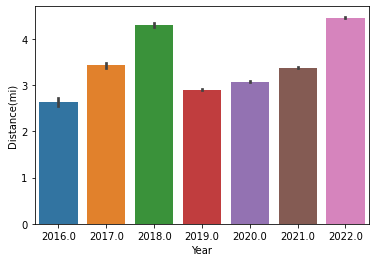

In [34]:
sns.barplot(data = df_drop_we_pr, x = 'Year', y = 'Distance(mi)')

<AxesSubplot: xlabel='Year', ylabel='DelayFromTypicalTraffic(mins)'>

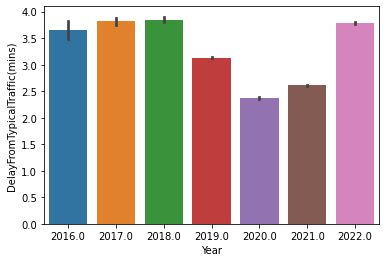

In [35]:
sns.barplot(data = df_drop_we_pr, x = 'Year', y = 'DelayFromTypicalTraffic(mins)')

<AxesSubplot: xlabel='Year', ylabel='DelayFromFreeFlowSpeed(mins)'>

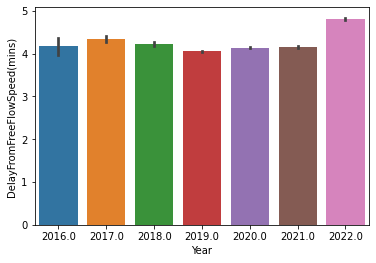

In [36]:
sns.barplot(data = df_drop_we_pr, x = 'Year', y = 'DelayFromFreeFlowSpeed(mins)')

<AxesSubplot: xlabel='Year', ylabel='Temperature(F)'>

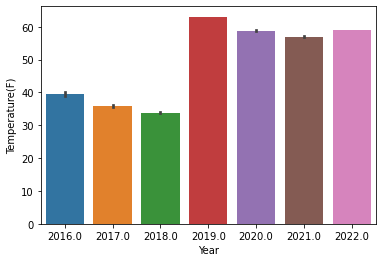

In [37]:
sns.barplot(data = df_drop_we_pr, x = 'Year', y = 'Temperature(F)')

<AxesSubplot: xlabel='Year', ylabel='Humidity(%)'>

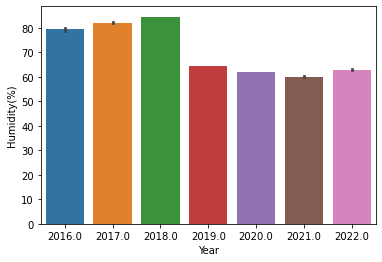

In [38]:
sns.barplot(data = df_drop_we_pr, x = 'Year', y = 'Humidity(%)')

<AxesSubplot: xlabel='Year', ylabel='Visibility(mi)'>

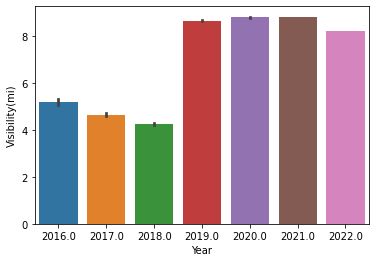

In [39]:
sns.barplot(data = df_drop_we_pr, x = 'Year', y = 'Visibility(mi)')

<AxesSubplot: xlabel='Year', ylabel='WindSpeed(mph)'>

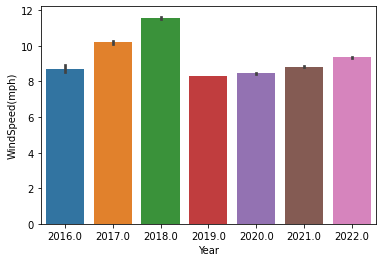

In [40]:
sns.barplot(data = df_drop_we_pr, x = 'Year', y = 'WindSpeed(mph)')

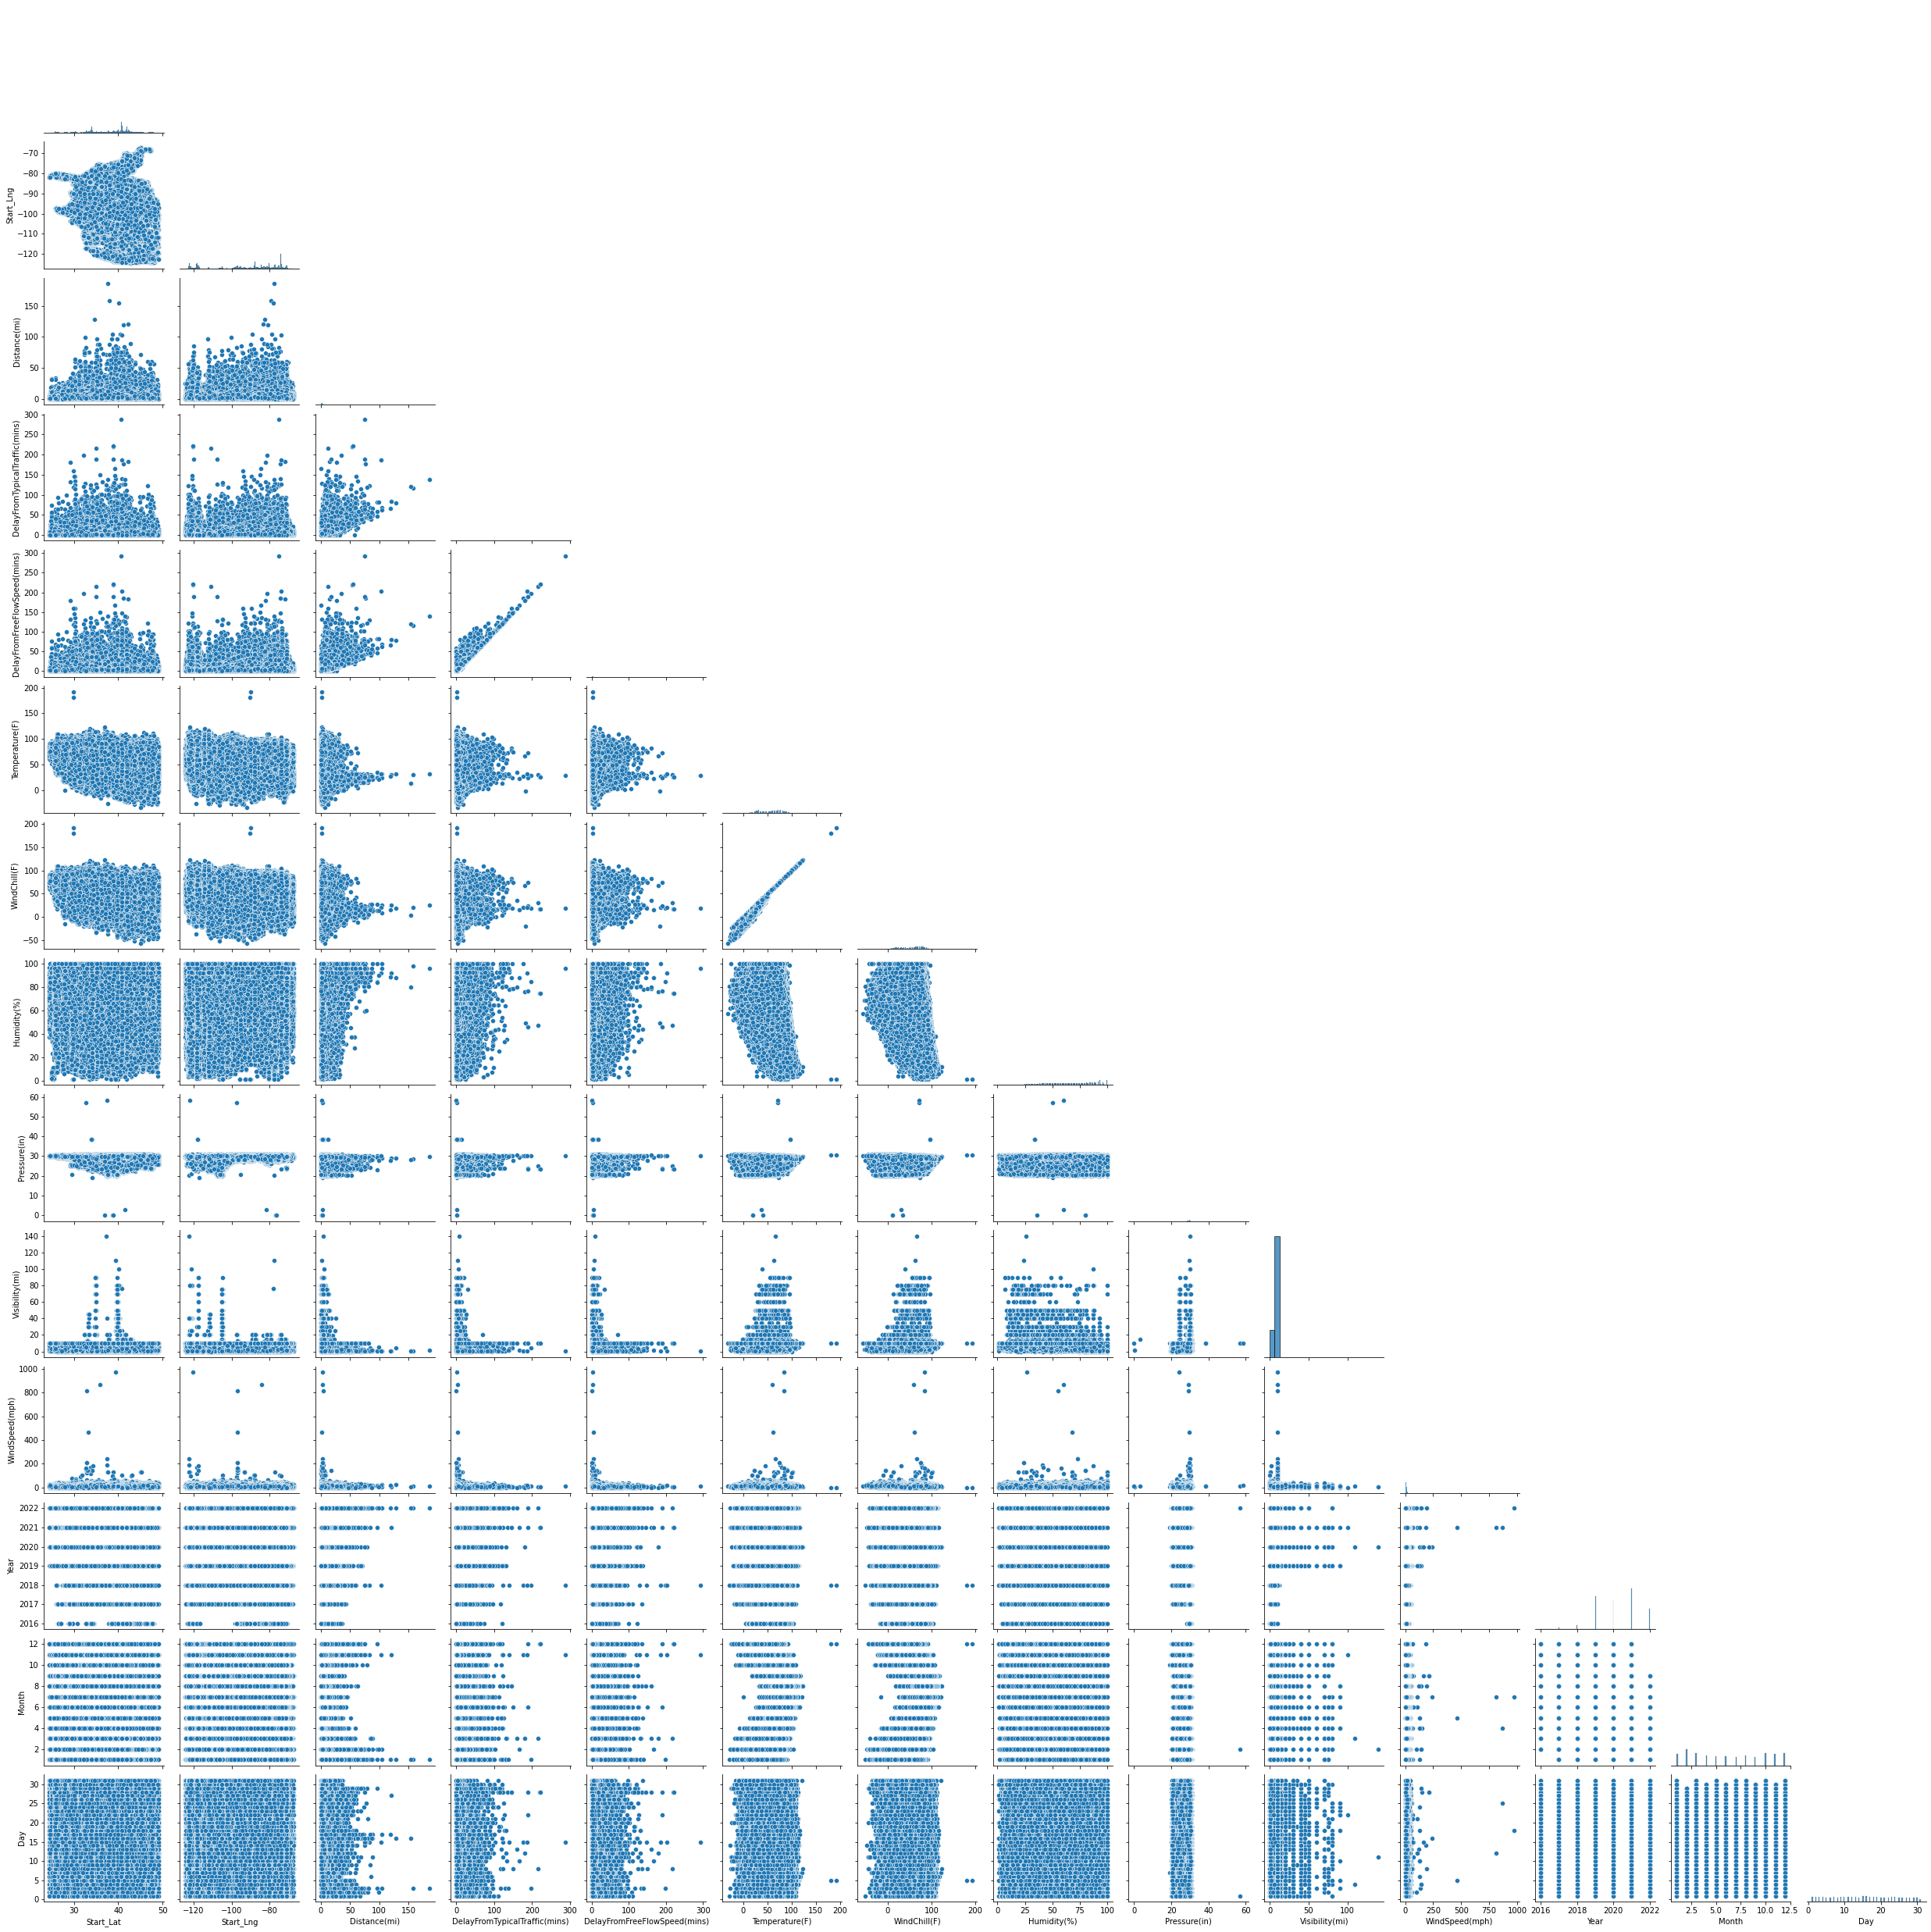

In [43]:
sns.pairplot(df_drop_we_pr, corner=True)